In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px

### Carrega dados

In [2]:
dados = pd.read_excel('../data/CelularesSubtraidos_2024.xlsx')
# dados_2023 = pd.concat([pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JAN_JUN_2023'), pd.read_excel('../data/SPDadosCriminais_2023.xlsx', sheet_name='JUL_DEZ_2023')])
# len(dados)

In [3]:
dados = dados[dados['NOME_MUNICIPIO']=='RIBEIRAO PRETO']
print(len(dados))

dados.head(3)

113036


,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,NOME_MUNICIPIO,ANO_BO,NUM_BO,VERSAO,NOME_DEPARTAMENTO_CIRC,NOME_SECCIONAL_CIRC,...,DESCR_MODO_OBJETO,DESCR_TIPO_OBJETO,DESCR_SUBTIPO_OBJETO,DESCR_UNIDADE,QUANTIDADE_OBJETO,MARCA_OBJETO,FLAG_BLOQUEIO,FLAG_DESBLOQUEIO,MES,ANO
19315,100919,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,CPJ RIBEIRAO PRETO,RIBEIRAO PRETO,2024,AB7941,1,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Apple,S,N,1,2024
19316,100919,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,CPJ RIBEIRAO PRETO,RIBEIRAO PRETO,2024,AV6768,1,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Samsung,S,N,1,2024
19317,100919,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,CPJ RIBEIRAO PRETO,RIBEIRAO PRETO,2024,BE5611,1,DEINTER 3 - RIBEIRAO PRETO,DEL.SEC.RIBEIRAO PRETO,...,Subtraído,Telecomunicação,Telefone Celular,Unidade,1,Samsung,N,N,1,2024


### Entendimento dos Dados

In [4]:
print("Variáveis:")
print(dados.columns)

Variáveis:
Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'VERSAO',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA',
       'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO',
       'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO', 'AUTORIA_BO',
       'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA', 'FLAG_FLAGRANTE',
       'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL', 'RUBRICA',
       'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'CIDADE', 'BAIRRO', 'CEP', 'LOGRADOURO_VERSAO',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO',
       'MARCA_OBJETO', 'FLAG_BLOQUEIO', 'FLAG_DESBLOQUEIO', 'MES', 'ANO

In [23]:
dados['RUBRICA'].value_counts()

RUBRICA
Furto (art. 155)                                                                    534
Roubo (art. 157)                                                                    393
Perda/Extravio                                                                      217
Outros não criminal                                                                  26
Localização/Apreensão e Entrega de veículo                                           13
Caput Corromper ou facilitar a corrupção de menor de 18 anos (244B)                   5
Estelionato (art. 171)                                                                4
Adulteração de sinal identificador de veículo automotor (art. 311)                    3
Localização/Apreensão e Entrega de objeto                                             3
Ameaça (art. 147)                                                                     3
Receptação (art. 180)                                                                 3
Lesão corporal (art. 129

Valores ausentes

In [5]:
# Valores Ausentes
print("\nValores Ausentes por Coluna:")
print(dados.isnull().sum())

# Distribuição de Valores Ausentes
print("\nDistribuição de Valores Ausentes (Percentual):")
missing_percentage = (dados.isnull().sum() / len(dados)) * 100
print(missing_percentage)


# # Visualização da Distribuição de Valores Ausentes
# plt.figure(figsize=(10, 6))
# sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
# plt.xticks(rotation=90)
# plt.title('Percentual de Valores Ausentes por Coluna')
# plt.ylabel('Percentual')
# plt.xlabel('Colunas')
# plt.show()


Valores Ausentes por Coluna:
ID_DELEGACIA                 0
NOME_DEPARTAMENTO            0
NOME_SECCIONAL               0
NOME_DELEGACIA               0
NOME_MUNICIPIO               0
ANO_BO                       0
NUM_BO                       0
VERSAO                       0
NOME_DEPARTAMENTO_CIRC       0
NOME_SECCIONAL_CIRC          0
NOME_DELEGACIA_CIRC          0
NOME_MUNICIPIO_CIRC          0
DATA_OCORRENCIA_BO           0
HORA_OCORRENCIA            631
DESCRICAO_APRESENTACAO       0
DATAHORA_REGISTRO_BO         0
DATA_COMUNICACAO_BO          0
DATAHORA_IMPRESSAO_BO        0
DESCR_PERIODO              590
AUTORIA_BO                   0
FLAG_INTOLERANCIA            0
TIPO_INTOLERANCIA         1221
FLAG_FLAGRANTE               0
FLAG_STATUS                  0
DESC_LEI                     0
FLAG_ATO_INFRACIONAL         0
RUBRICA                      0
DESCR_CONDUTA              290
DESDOBRAMENTO             1191
CIRCUNSTANCIA             1101
DESCR_TIPOLOCAL            152
DESCR_SUB

## Pre processamento

In [6]:
# Madrugada: 0h - 5h
# Manhã: 6h - 11h
# Tarde: 12h - 17h
# Noite: 18h - 23h

dados_filter = dados.dropna(subset=['HORA_OCORRENCIA'])

dados_filter['HORA_OCORRENCIA'] = pd.to_datetime(dados_filter['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour

def categorizar_periodo(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'

# Aplicar a função de categorização
dados_filter['PERIODO_DO_DIA'] = dados_filter['HORA_OCORRENCIA'].apply(categorizar_periodo)

# Contar o número de ocorrências em cada período do dia
periodo_counts = dados_filter['PERIODO_DO_DIA'].value_counts().sort_index()

dados['PERIODO_DO_DIA'] = dados_filter['PERIODO_DO_DIA']
print(periodo_counts)

PERIODO_DO_DIA
Madrugada    104
Manhã        125
Noite        224
Tarde        137
Name: count, dtype: int64


/tmp/ipykernel_92071/1698926936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filter['HORA_OCORRENCIA'] = pd.to_datetime(dados_filter['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour
/tmp/ipykernel_92071/1698926936.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filter['PERIODO_DO_DIA'] = dados_filter['HORA_OCORRENCIA'].apply(categorizar_periodo)


In [7]:
import unicodedata

def normalize_string(s):
    if isinstance(s, str):
        s = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode('utf-8')
        return s.upper()
    return s

# Aplicar a normalização à coluna 'BAIRRO'
dados['BAIRRO'] = dados['BAIRRO'].apply(normalize_string)

mapping = {
    'CAMPOS ELISIOS': 'CAMPOS ELISEOS',
    # Adicione outras correções específicas aqui, se necessário
}

# Função para aplicar o mapeamento
def correct_bairro(bairro):
    return mapping.get(bairro, bairro)

# Aplicar a correção à coluna 'BAIRRO'
dados['BAIRRO'] = dados['BAIRRO'].apply(correct_bairro)

# Agrupar pelos bairros corrigidos e somar as ocorrências
# dados = dados.groupby('BAIRRO')['COUNT'].sum().reset_index()
dados['BAIRRO'].value_counts()

BAIRRO
CENTRO                    161
CAMPOS ELISEOS            137
ALTO DO IPIRANGA           42
VILA TIBERIO               40
IPIRANGA                   39
                         ... 
PARQUE DAS GAIVOTAS         1
RURAL                       1
RECANTO DAS PALMEIRAS       1
JARDIM JOVINO CAMPOS        1
JARDIM GENESIO MASSARO      1
Name: count, Length: 173, dtype: int64

## Analises iniciais


### Mapa de calor com crimes

In [33]:
map_center = [-21.1775, -47.8103]

def gera_heatmap(data, path_to_save):
    # Criar um mapa base
    mapa = folium.Map(location=map_center, zoom_start=12)

    # Adicionar os pontos de crimes como um mapa de calor
    heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data.iterrows() if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE'])]
    HeatMap(heat_data).add_to(mapa)

    # Adicionar os pontos de crimes usando clusters
    marker_cluster = MarkerCluster().add_to(mapa)
    for index, row in data.iterrows():
        if not pd.isnull(row['LATITUDE']) and not pd.isnull(row['LONGITUDE']):
            folium.Marker(
                location=[row['LATITUDE'], row['LONGITUDE']],
                popup = (
                    f"Tipo de Local: {row['DESCR_TIPOLOCAL']}<br>"
                    f"Data: {row['DATA_OCORRENCIA_BO']}<br>"
                    f"Lat: {row['LATITUDE']}<br>"
                    f"Lng: {row['LONGITUDE']}"
                ),
                icon=folium.Icon(color='blue', icon='info-sign')
            ).add_to(marker_cluster)

    # Salvar o mapa em um arquivo HTML
    mapa.save(path_to_save)
    
path='../results/heatmap_rp_celular.html'
gera_heatmap(dados, path)

In [37]:
dados_filtered = dados[dados['PERIODO_DO_DIA']=='Madrugada']
path='../results/heatmap_rp_celular_madrugada.html'
gera_heatmap(dados_filtered, path)

dados_filtered = dados[dados['PERIODO_DO_DIA']=='Noite']
path='../results/heatmap_rp_celular_noite.html'
gera_heatmap(dados_filtered, path)

dados_filtered = dados[dados['PERIODO_DO_DIA']=='Manhã']
path='../results/heatmap_rp_celular_manha.html'
gera_heatmap(dados_filtered, path)

dados_filtered = dados[dados['PERIODO_DO_DIA']=='Tarde']
path='../results/heatmap_rp_celular_tarde.html'
gera_heatmap(dados_filtered, path)


### Local com maior ocorrencia

/tmp/ipykernel_92071/4150697433.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_20_locais_df, palette='viridis')


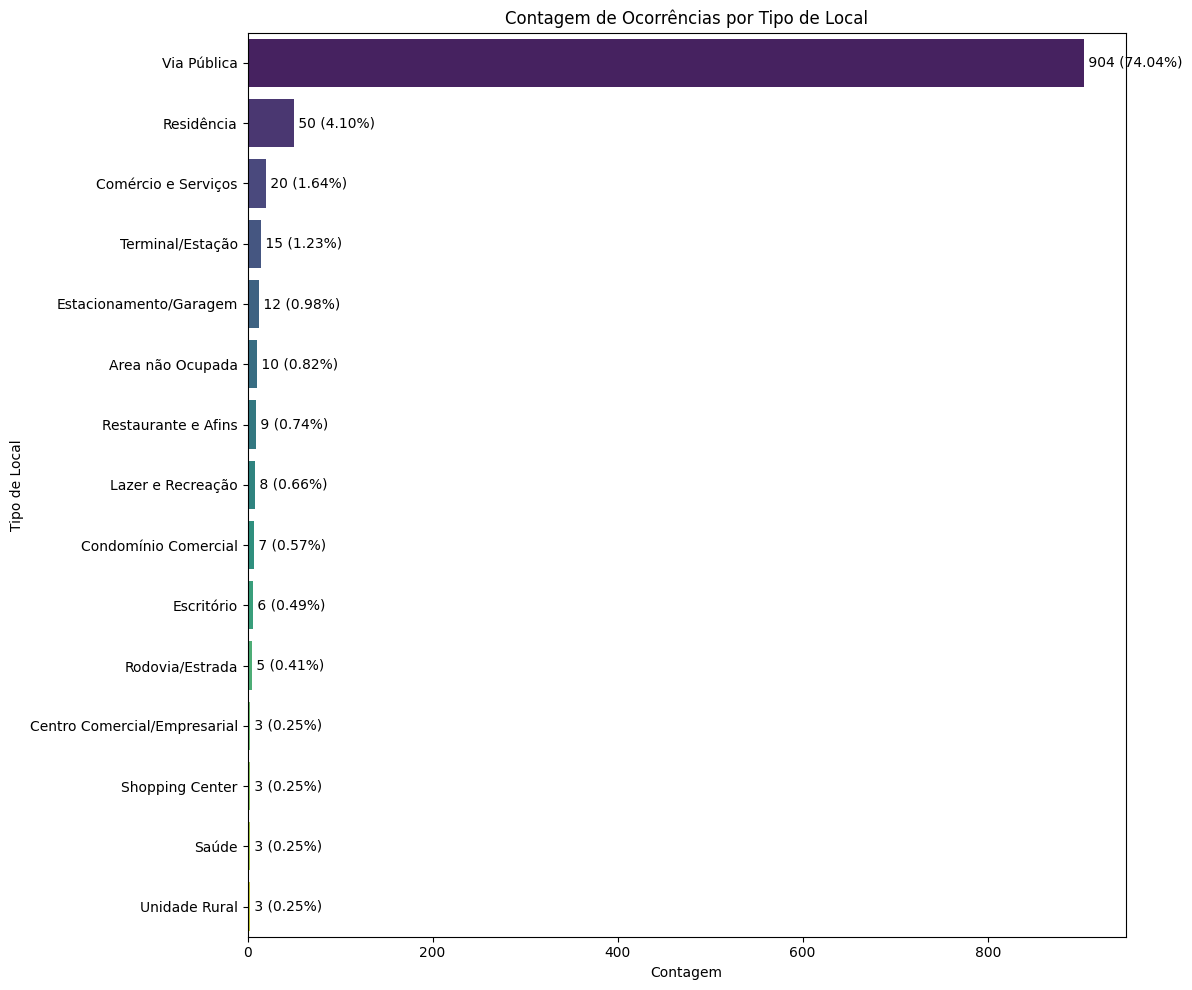

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de ocorrências por tipo de local
tipo_local_counts = dados['DESCR_TIPOLOCAL'].value_counts()

# Filtrar para obter os top 20 tipos de locais com mais ocorrências
top_20_locais = tipo_local_counts.head(15)

# Reformatar os dados para um DataFrame
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['DESCR_TIPOLOCAL', 'Contagem']

# Plotando o gráfico
plt.figure(figsize=(12, 10))

# Barplot principal
sns.barplot(x='Contagem', y='DESCR_TIPOLOCAL', data=top_20_locais_df, palette='viridis')

# Adicionando informações de proporção dentro das barras
for index, value in enumerate(top_20_locais):
    plt.text(value, index, f' {value} ({value / len(dados) * 100:.2f}%)', ha='left', va='center', color='black')

# Configurações do gráfico
plt.title('Contagem de Ocorrências por Tipo de Local')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')

# Ajustando o layout
plt.tight_layout()
plt.show()


In [52]:
tipo_counts = dados['RUBRICA'].value_counts()
# top_counts = tipo_local_counts.head(4)
# top_counts['Outros'] = tipo_counts[~tipo_counts.isin([['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio', 'Outros não criminal']])].sum()
# tipo_counts
tipo_counts['Outros'] = tipo_counts[~tipo_counts.index.isin(['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio', 'Outros não criminal'])].sum()
tipo_counts = tipo_counts[['Furto (art. 155)', 'Roubo (art. 157)', 'Perda/Extravio', 'Outros', 'Outros não criminal']]

/tmp/ipykernel_92071/2912904994.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contagem', y='RUBRICA', data=top_20_locais_df, palette='viridis')


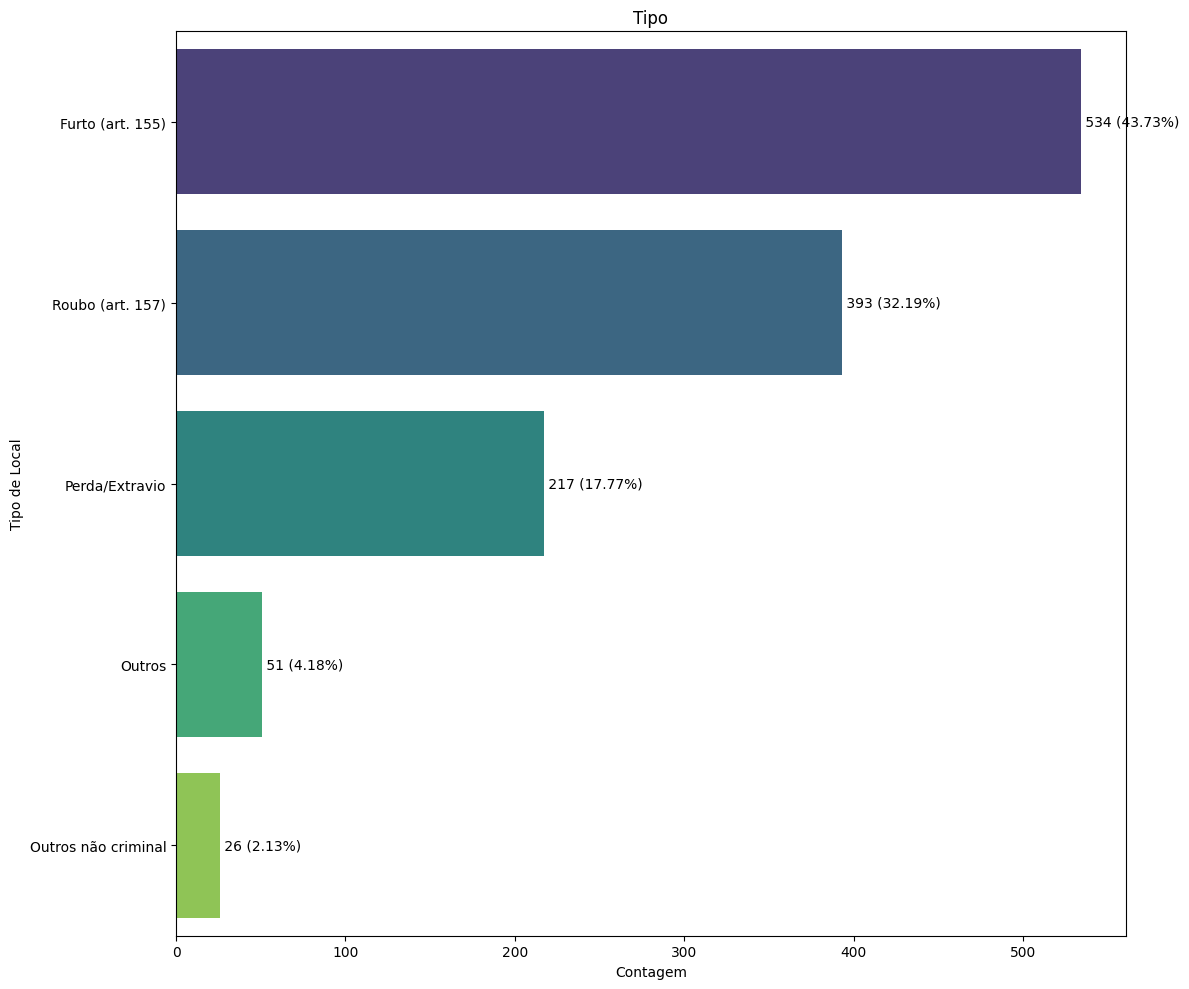

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem de ocorrências por tipo de local
# tipo_local_counts = dados['RUBRICA'].value_counts()

# Filtrar para obter os top 20 tipos de locais com mais ocorrências
top_20_locais = tipo_counts.head(5)

# Reformatar os dados para um DataFrame
top_20_locais_df = top_20_locais.reset_index()
top_20_locais_df.columns = ['RUBRICA', 'Contagem']

# Plotando o gráfico
plt.figure(figsize=(12, 10))

# Barplot principal
sns.barplot(x='Contagem', y='RUBRICA', data=top_20_locais_df, palette='viridis')

# Adicionando informações de proporção dentro das barras
for index, value in enumerate(top_20_locais):
    plt.text(value, index, f' {value} ({value / len(dados) * 100:.2f}%)', ha='left', va='center', color='black')

# Configurações do gráfico
plt.title('Tipo')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Local')

# Ajustando o layout
plt.tight_layout()
plt.show()


### Coordenadas paralelas

In [55]:
dados['Indice Ocorrencia'] = range(len(dados))
dados

# dados_filter_rp = dados.dropna(subset=['BAIRRO', 'PERIODO_DO_DIA'])

# Identificar os bairros com mais ocorrências
bairros_mais_ocorrencias = dados['BAIRRO'].value_counts().nlargest(5).index
bairros_mais_ocorrencias
dados_filter_rp = dados[dados['BAIRRO'].isin(bairros_mais_ocorrencias)]
dados_filter_rp['BAIRRO'].value_counts()

/tmp/ipykernel_20540/2773427913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['Indice Ocorrencia'] = range(len(dados))


BAIRRO
CENTRO              161
CAMPOS ELISEOS      137
ALTO DO IPIRANGA     42
VILA TIBERIO         40
IPIRANGA             39
Name: count, dtype: int64

In [56]:
# Mapear categorias para cores utilizando a paleta de cores do Seaborn
palette = sns.color_palette("tab10", len(dados_filter_rp['CATEGORIA'].unique()))
cor_por_categoria = dict(zip(dados_filter_rp['CATEGORIA'].unique(), palette))
cor_por_categoria_rgb = {cat: f'rgb({int(cor[0]*255)},{int(cor[1]*255)},{int(cor[2]*255)})' for cat, cor in cor_por_categoria.items()}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['CATEGORIA'].map(cor_por_categoria_rgb)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'PERIODO_DO_DIA', 'CATEGORIA'],
                             color='COR', labels={'BAIRRO': 'Bairro', 'PERIODO_DO_DIA': 'Período do Dia', 'CATEGORIA': 'Categoria'})

# Adicionar título
fig.update_layout(title='Distribuição de Crimes por Categoria e Período do Dia nos Bairros com mais Ocorrências')

# Mostrar o gráfico
fig.write_html("parallel_categories_rp_celular.html")

KeyError: 'CATEGORIA'

In [98]:
# dados_filter_rp = dados_filter_rp.dropna(subset=['DESCR_TIPOLOCAL', 'PERIODO_DO_DIA', 'CATEGORIA'])

# Mapear categorias para cores específicas
cor_por_categoria = {
    'Furtos': 'blue',
    'Roubos': 'orange',
    'Lesões': 'green',
    'Tráfico e Porte de Entorpecentes': 'red',
    'Homicídios': 'purple',
    'Estupros': 'yellow',
    'Outros Crimes Violentos': 'brown',
    'Outros': 'gray'
}

# Adicionar uma coluna de cores ao DataFrame com base na categoria
dados_filter_rp['COR'] = dados_filter_rp['CATEGORIA'].map(cor_por_categoria)

# Criar o gráfico de coordenadas paralelas
fig = px.parallel_categories(dados_filter_rp, dimensions=['BAIRRO', 'PERIODO_DO_DIA', 'CATEGORIA'],
                             color='COR')

# Adicionar título
fig.update_layout(title='Gráfico de Coordenadas Paralelas para Crimes')


# Mostrar o gráfico
fig.write_html("parallel_categories_rp.html")


In [ ]:
# dados_mini['Indice Ocorrencia'] = range(len(dados_mini))

# # Gráfico de coordenadas paralelas
# fig = px.parallel_categories(dados_mini[['DESCR_TIPOLOCAL', 'DESC_PERIODO', 'NATUREZA_APURADA', 'Indice Ocorrencia']], 
#                               color="Indice Ocorrencia",
#                               color_continuous_scale=px.colors.sequential.Viridis,
#                               labels={"DESCR_TIPOLOCAL": "Tipo Local", 
#                                       "DESC_PERIODO": "Horário do Dia", 
#                                       "NATUREZA_APURADA": "Crime Associado"},
#                               title="Coordenadas Paralelas: Tipo Local, Horário do Dia e Crime Associado")

# # fig.show()
# fig.write_html("parallel_categories.html")

### Verificar periodo do dia com mais crimes / horario do dia 

/tmp/ipykernel_23829/4252471761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_hora['HORA_OCORRENCIA'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour


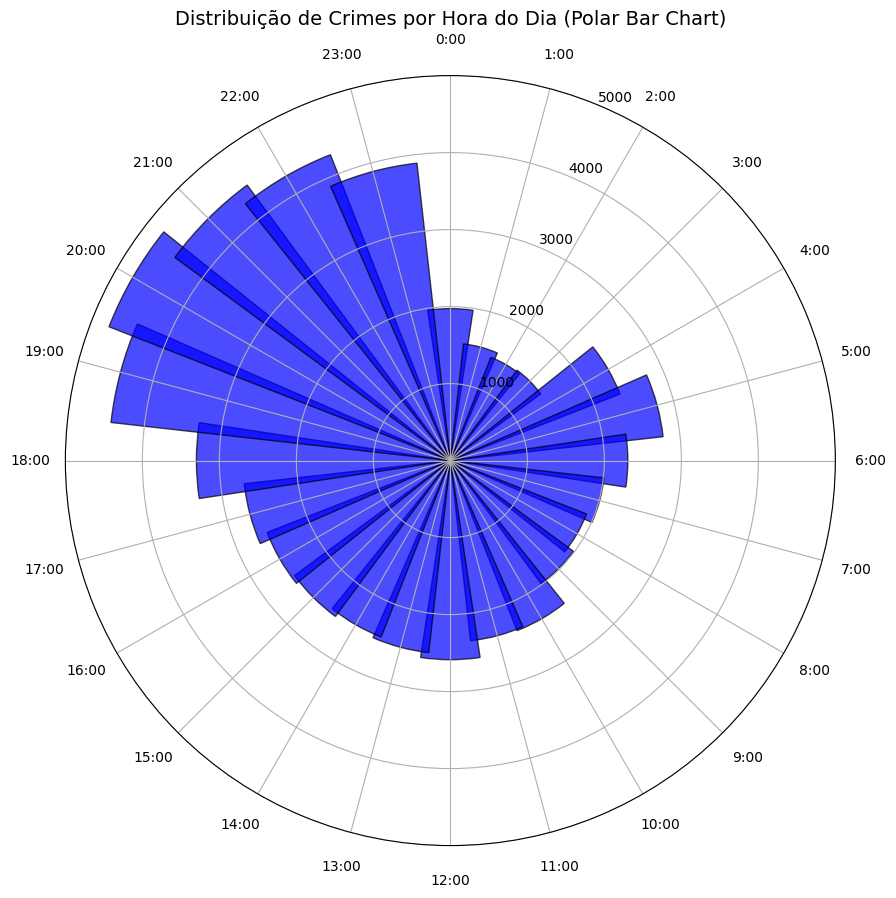

In [4]:
dados_hora = dados.dropna(subset=['HORA_OCORRENCIA'])

# Converter a coluna 'HORA_OCORRENCIA_BO' para o formato de hora
dados_hora['HORA_OCORRENCIA'] = pd.to_datetime(dados_hora['HORA_OCORRENCIA'], format='%H:%M:%S').dt.hour

# Agrupar os dados por hora e contar o número de ocorrências
hour_counts = dados_hora['HORA_OCORRENCIA'].value_counts().sort_index()

# Preparar os dados para o gráfico de barras polar
labels = hour_counts.index
values = hour_counts.values

# Criação do gráfico de barras polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Criação do ângulo para cada barra no sentido horário
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Adicionar valores iniciais ao final para fechamento do gráfico
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# Plot das barras
bars = ax.bar(angles[:-1], values[:-1], width=0.3, color='blue', edgecolor='black', alpha=0.7)

# Ajuste dos rótulos para seguir a ordem do relógio
ax.set_xticks(angles[:-1])
ax.set_xticklabels([f'{int(label)}:00' for label in labels])

# Rotacionar os labels para ficarem mais legíveis
ax.tick_params(axis='x', which='major', pad=15)

# Ajustar a posição do zero para o topo do gráfico e rotação para sentido horário
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Adicionar título
plt.title('Distribuição de Crimes por Hora do Dia (Polar Bar Chart)', fontsize=14)

# Mostrar o gráfico
plt.show()


### Analise de correlação

In [59]:
dados.columns

Index(['ID_DELEGACIA', 'NOME_DEPARTAMENTO', 'NOME_SECCIONAL', 'NOME_DELEGACIA',
       'NOME_MUNICIPIO', 'ANO_BO', 'NUM_BO', 'VERSAO',
       'NOME_DEPARTAMENTO_CIRC', 'NOME_SECCIONAL_CIRC', 'NOME_DELEGACIA_CIRC',
       'NOME_MUNICIPIO_CIRC', 'DATA_OCORRENCIA_BO', 'HORA_OCORRENCIA',
       'DESCRICAO_APRESENTACAO', 'DATAHORA_REGISTRO_BO', 'DATA_COMUNICACAO_BO',
       'DATAHORA_IMPRESSAO_BO', 'DESCR_PERIODO', 'AUTORIA_BO',
       'FLAG_INTOLERANCIA', 'TIPO_INTOLERANCIA', 'FLAG_FLAGRANTE',
       'FLAG_STATUS', 'DESC_LEI', 'FLAG_ATO_INFRACIONAL', 'RUBRICA',
       'DESCR_CONDUTA', 'DESDOBRAMENTO', 'CIRCUNSTANCIA', 'DESCR_TIPOLOCAL',
       'DESCR_SUBTIPOLOCAL', 'CIDADE', 'BAIRRO', 'CEP', 'LOGRADOURO_VERSAO',
       'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE',
       'CONT_OBJETO', 'DESCR_MODO_OBJETO', 'DESCR_TIPO_OBJETO',
       'DESCR_SUBTIPO_OBJETO', 'DESCR_UNIDADE', 'QUANTIDADE_OBJETO',
       'MARCA_OBJETO', 'FLAG_BLOQUEIO', 'FLAG_DESBLOQUEIO', 'MES', 'ANO',
       '

/tmp/ipykernel_20540/1933653164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados['DATA_COMUNICACAO_BO'])
/tmp/ipykernel_20540/1933653164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])
/tmp/ipykernel_20540/1933653164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

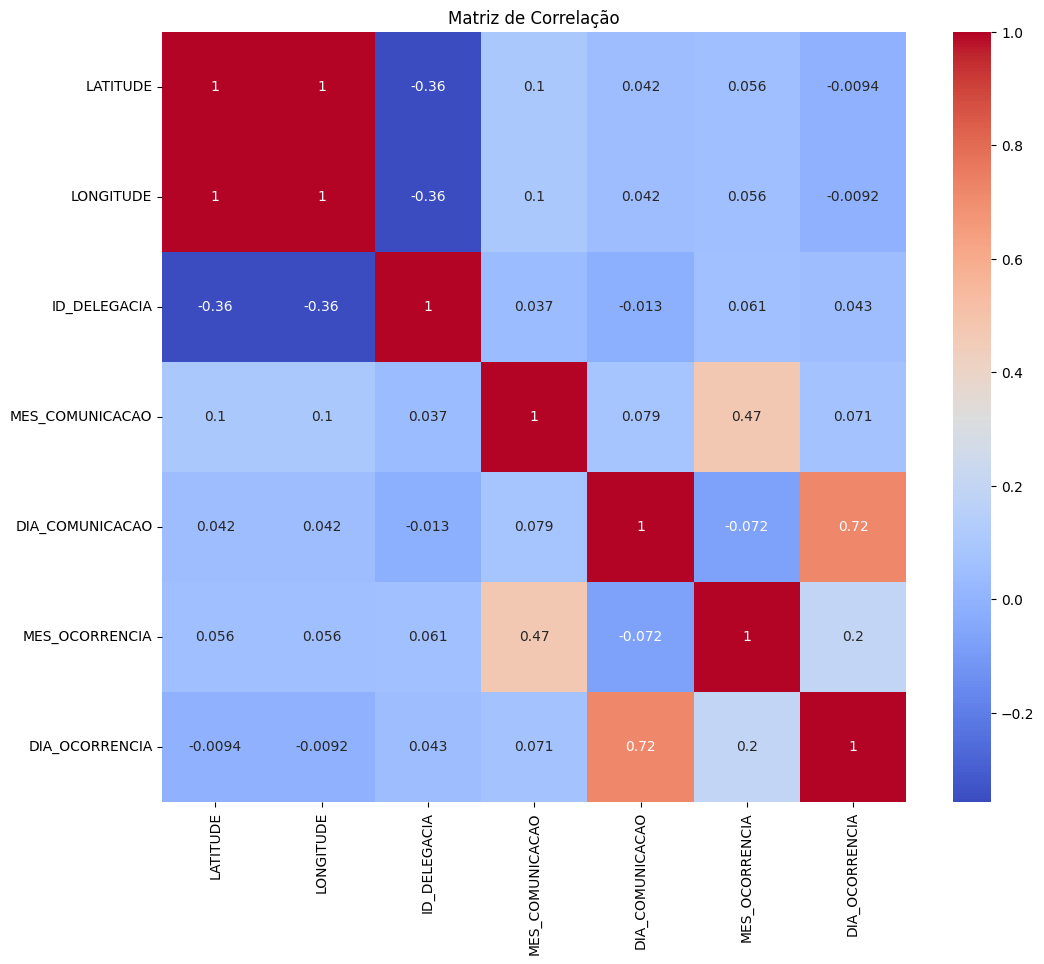

In [65]:
# Converter colunas de data para datetime
dados['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados['DATA_COMUNICACAO_BO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Extrair partes da data para análise
dados['ANO_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.year
dados['MES_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.month
dados['DIA_COMUNICACAO'] = dados['DATA_COMUNICACAO_BO'].dt.day
dados['ANO_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.year
dados['MES_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.month
dados['DIA_OCORRENCIA'] = dados['DATA_OCORRENCIA_BO'].dt.day

# Selecionar as colunas relevantes para correlação
colunas_para_correlacao = [ 
                           'LATITUDE', 'LONGITUDE', 'ID_DELEGACIA',
                           'MES_COMUNICACAO', 'DIA_COMUNICACAO', 'MES_OCORRENCIA', 'DIA_OCORRENCIA']

dados_numericos = dados[colunas_para_correlacao]
dados_numericos
# Calcular a matriz de correlação entre variáveis numéricas
correlation_matrix = dados_numericos.corr()

# # Plotar o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


### Analise tempo ate o BO

Outra questão interessante é quanto tempo as pessoas esperam antes de denunciar o crime. Ao subtrair a data em que o crime ocorreu e foi denunciado, obtenho informações sobre o tempo de “atraso” e estratifico-os por crimes.

In [67]:
# Converter colunas de data para o formato datetime
dados['DATA_COMUNICACAO_BO'] = pd.to_datetime(dados['DATA_COMUNICACAO_BO'])
dados['DATA_OCORRENCIA_BO'] = pd.to_datetime(dados['DATA_OCORRENCIA_BO'])

# Calcular o tempo de atraso em dias
dados['TEMPO_ATRASO'] = (dados['DATA_COMUNICACAO_BO'] - dados['DATA_OCORRENCIA_BO']).dt.days

dados = dados[dados['TEMPO_ATRASO'] >= 0]

# Filtrar crimes que aparecem pelo menos 10 vezes
crime_counts = dados['NATUREZA_APURADA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['NATUREZA_APURADA'].isin(crimes_filtrados)]

# Exibir os primeiros registros para verificar
print(len(dados_filtrados))
print(dados_filtrados[['DATA_OCORRENCIA_BO', 'DATA_COMUNICACAO_BO', 'TEMPO_ATRASO']].head())


KeyError: 'NATUREZA_APURADA'

In [ ]:

atraso_por_crime = dados_filtrados.groupby('NATUREZA_APURADA')['TEMPO_ATRASO'].describe()

print(len(atraso_por_crime))
# Exibir as estatísticas descritivas
print(atraso_por_crime.head(50))

plt.figure(figsize=(14, 8))
sns.boxplot(x='TEMPO_ATRASO', y='NATUREZA_APURADA', data=dados_filtrados, showfliers=False)
plt.title('Distribuição do Tempo de Atraso na Comunicação de Crimes por Tipo de Crime')
plt.xlabel('Tempo de Atraso (dias)')
plt.ylabel('Tipo de Crime')
plt.show()


In [ ]:
atraso_por_crime

crime_counts = dados['NATUREZA_APURADA'].value_counts()
crimes_filtrados = crime_counts[crime_counts >= 10].index
dados_filtrados = dados[dados['NATUREZA_APURADA'].isin(crimes_filtrados)]

# Criar os intervalos de tempo
intervalos = [-1, 0, 1, 2, 7, 30, 365, float('inf')]
labels = ['No mesmo dia', '1 dia de atraso', '2 dias', '3 a 7 dias', '8 a 30 dias', '30 dias a 1 ano', 'Mais de 1 ano']

# Adicionar uma nova coluna com a categoria de tempo de atraso
dados_filtrados['TEMPO_CATEGORIA'] = pd.cut(dados_filtrados['TEMPO_ATRASO'], bins=intervalos, labels=labels)

# Agrupar por crime e categoria de tempo de atraso
atraso_por_crime = dados_filtrados.groupby(['NATUREZA_APURADA', 'TEMPO_CATEGORIA']).size().unstack(fill_value=0)

atraso_por_crime

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você já tenha os dados e tenha feito as operações necessárias para criar o dataframe 'atraso_por_crime'

# Configurar o estilo e tamanho do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Calcular o total de ocorrências para cada tipo de crime
atraso_por_crime['Total'] = atraso_por_crime[labels].sum(axis=1)

# Calcular a proporção em relação ao total para cada categoria de tempo de atraso
for categoria in labels:
    atraso_por_crime[categoria] = atraso_por_crime[categoria] / atraso_por_crime['Total']

# Definir uma paleta de cores diferente
cores = sns.color_palette("rocket", len(labels))

# Plotar o histograma empilhado
for i, categoria in enumerate(labels):
    print(atraso_por_crime.index)
    plt.barh(atraso_por_crime.index, atraso_por_crime[categoria], label=categoria, color=cores[i])

# Adicionar legenda
plt.legend()

# Adicionar título e rótulos nos eixos
plt.title('Proporção de ocorrências por categoria de tempo de atraso e crime')
plt.xlabel('Proporção de Ocorrências')
plt.ylabel('Tipo de Crime')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Lista de paletas de cores disponíveis no Seaborn
# paletas_seaborn = [
#     "deep", "muted", "bright", "pastel", "dark", "colorblind",
#     "rocket", "mako", "flare", "crest", "cubehelix", "icefire", "vlag", "viridis", "plasma", "inferno", "magma",
#     "twilight", "twilight_shifted", "hsv",
# ]

# # Testar diferentes paletas de cores
# for paleta in paletas_seaborn:
#     plt.figure(figsize=(10, 2))
#     sns.palplot(sns.color_palette(paleta))
#     plt.title(paleta)
#     plt.show()


## Estatísticas Descritivas

In [ ]:
# Distribuição temporal
print(dados['ANO_BO'].value_counts())
print(dados['MES_ESTATISTICA'].value_counts())
print(dados['HORA_OCORRENCIA_BO'].value_counts())
print(dados['DESC_PERIODO'].value_counts())

# Hipóteses - proximo notebook

<!-- ## O número de crimes tem aumentado ou diminuído ao longo dos anos/meses ? -->
<!-- 
vamos usar a data de comunicação (DATA_COMUNICACAO) por que se a gente usar a data bo vai ser inconsistente porque pode ter ocorrido um crime e a pessoa só denunciar 10 anos depois. -->

In [ ]:
# dados.groupby(['ANO_ESTATISTICA', 'MES_ESTATISTICA']).size().reset_index(name='counts')

# # dados['DATA_COMUNICACAO']

In [ ]:
# # Converter colunas de datas para datetime
# dados['DATA_COMUNICACAO'] = pd.to_datetime(dados['DATA_COMUNICACAO'], format='%Y-%m-%d')

# # Extrair ano e mês das datas
# dados['ano'] = dados['DATA_COMUNICACAO'].dt.year
# dados['mes'] = dados['DATA_COMUNICACAO'].dt.month

# dados_2023_2024 = dados[dados['ano'].isin([2023, 2024])]

# ocorrencias_por_mes = dados_2023_2024.groupby(['ano', 'mes']).size().reset_index(name='counts')

# plt.figure(figsize=(14, 8))
# sns.lineplot(data=ocorrencias_por_mes, x='mes', y='counts', hue='ano', palette='tab10')
# plt.xlabel('Mês')
# plt.ylabel('Número de Ocorrências')
# plt.title('Ocorrências por Mês em 2023 e 2024')
# plt.legend(title='Ano', loc='upper right')
# plt.grid(True)
# plt.show()

In [ ]:
# dados.groupby(['ano', 'mes']).size().reset_index(name='counts')